In [2]:
import ephem
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import matplotlib as mpl

In [8]:
#Lets define some lines and angles to be used in our design, based on what we computed. 
x = np.linspace(-30,30,30)
y = [line(x,equinox_rise[1]),line(x,summer_solstice_set[1]),line(x,summer_solstice_rise[1])]

angle=(-summer_solstice_rise[1]+np.pi/4)/np.pi*180
anglerad=-summer_solstice_rise[1]+np.pi/4

rayshighx=np.array([x[4],10*(-np.cos(anglerad)-np.sin(anglerad))])
rayshighy=np.array([y[2][4],10*(np.cos(anglerad)-np.sin(anglerad))])
rayslowx=np.array([x[4],10*(np.cos(anglerad)+np.sin(anglerad))])
rayslowy=np.array([y[2][4],10*(-np.cos(anglerad)+np.sin(anglerad))])

def line(x,m):
    return np.tan(-m+np.pi/2)*x

def draw_lines(x,y,text=None):
    for i in range(3):
        ax.plot(x,y[i])
        ax.scatter(x[4],y[i][4],marker='o',color='black')
        ax.scatter(x[25],y[i][25],marker='o',color='black')
        if text!=None:
            ax.text(x[4]-2,y[i][4]+1,text[i][0])
            ax.text(x[25]-14,y[i][4]+1,text[i][1])
    
def draw_pyramid(ax):
    for i in range (2,10):
        j=12-i
        if (j==3):rectangle=patches.Rectangle((-j,-j),2*j,2*j, color='black', alpha=0.5)
        else: rectangle=patches.Rectangle((-j,-j),2*j,2*j, color='red', alpha=0.2)
        t = mpl.transforms.Affine2D().rotate_deg_around(0,0,angle) + ax.transData
        rectangle.set_transform(t)
        ax.add_patch(rectangle)
            #ax.add_patch(rectangle2)

    for i in range (4):
        a=[[-1.5,3],[-1.5,-11],[3,-1.5],[-11,-1.5]]
        if i<=1:rectangle=patches.Rectangle((a[i]),3,8, color='black', alpha=0.5)
        else:rectangle=patches.Rectangle((a[i]),8,3, color='black', alpha=0.5)
        t = mpl.transforms.Affine2D().rotate_deg_around(0,0,angle) + ax.transData
        rectangle.set_transform(t)
        ax.add_patch(rectangle)

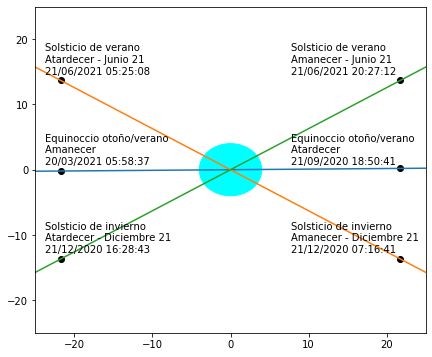

In [16]:
fig1,ax= plt.subplots(figsize=(7,6))
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)
text=[["Equinoccio otoño/verano\nAmanecer \n%s"%equinox_rise[0].strftime("%d/%m/%Y %H:%M:%S"),"Equinoccio otoño/verano\nAtardecer \n%s" %equinox_set[0].strftime("%d/%m/%Y %H:%M:%S")],
     ["Solsticio de verano\nAtardecer - Junio 21\n%s"%summer_solstice_rise[0].strftime("%d/%m/%Y %H:%M:%S"),"Solsticio de verano\nAmanecer - Junio 21\n%s"%summer_solstice_set[0].strftime("%d/%m/%Y %H:%M:%S")],
    ["Solsticio de invierno\nAtardecer - Diciembre 21\n%s"%winter_solstice_set[0].strftime("%d/%m/%Y %H:%M:%S"),"Solsticio de invierno\nAmanecer - Diciembre 21\n%s" %winter_solstice_rise[0].strftime("%d/%m/%Y %H:%M:%S")]]

draw_lines(x,y,text=text)
    
circle=patches.Circle((0,0),radius=4, color='cyan', alpha=1)
ax.add_patch(circle)

fig1.savefig("images/orientation.pdf")

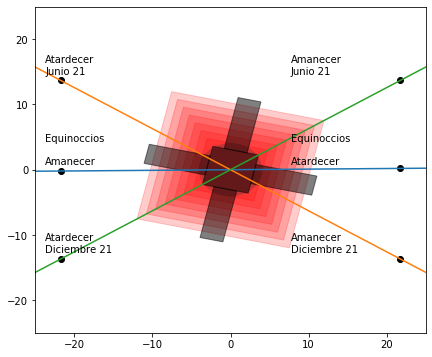

In [17]:
fig2,ax= plt.subplots(figsize=(7,6))
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)
text=[["Equinoccios\n\nAmanecer","Equinoccios\n\nAtardecer"],
      ["Atardecer\nJunio 21","Amanecer\nJunio 21"],["Atardecer\nDiciembre 21","Amanecer\nDiciembre 21"]]
draw_lines(x,y,text=text)   
circle=patches.Circle((0,0),radius=4, color='cyan', alpha=1)
ax.add_patch(circle)
draw_pyramid(ax=ax)


fig2.savefig("images/PyramidOrientation.pdf")

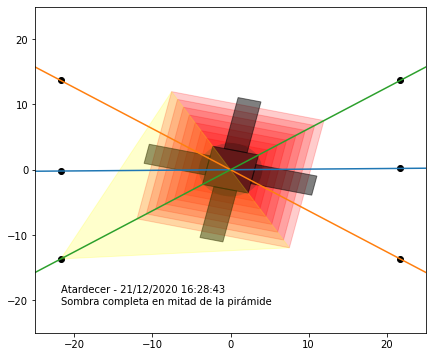

In [18]:
fig3,ax= plt.subplots(figsize=(7,6))
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)

for i in range(3):
    ax.plot(x,y[i])
    ax.scatter(x[4],y[i][4],marker='o',color='black')
    ax.scatter(x[25],y[i][25],marker='o',color='black')
    

circle=patches.Circle((0,0),radius=4, color='cyan', alpha=1)
ax.add_patch(circle)
draw_pyramid(ax=ax)
ax.fill(np.append(rayshighx, rayslowx[::-1]),np.append(rayshighy, rayslowy[::-1]), color='yellow', alpha=0.2)
ax.text(x[4],y[2][4]-7,"Atardecer - %s\nSombra completa en mitad de la pirámide" %winter_solstice_set[0].strftime("%d/%m/%Y %H:%M:%S"))

fig3.savefig("images/WinterShadow.pdf")

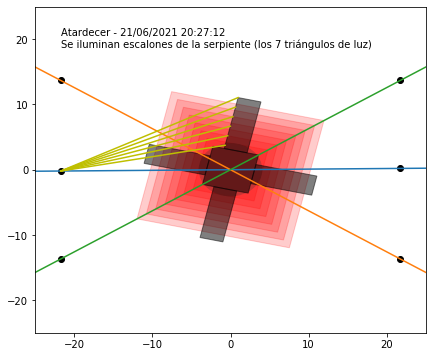

In [19]:
fig4,ax= plt.subplots(figsize=(7,6))
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)

for i in range(3):
    ax.plot(x,y[i])
    ax.scatter(x[4],y[i][4],marker='o',color='black')
    ax.scatter(x[25],y[i][25],marker='o',color='black')
    
circle=patches.Circle((0,0),radius=4, color='cyan', alpha=1)
ax.add_patch(circle)
draw_pyramid(ax=ax)

for i in range(6):
            raystairsx=np.array([x[4],-1.5*np.cos(anglerad)-(11-i*1.5)*np.sin(anglerad)])
            raystairsy=np.array([y[0][4],(11-i*1.5)*np.cos(anglerad)-1.5*np.sin(anglerad)])
            ax.plot(raystairsx,raystairsy,'y-')
ax.text(x[4],y[1][4]+5,"Atardecer - %s\nSe iluminan escalones de la serpiente (los 7 triángulos de luz)" %summer_solstice_set[0].strftime("%d/%m/%Y %H:%M:%S"))
 
fig4.savefig("images/TrianglesOfLight.pdf")

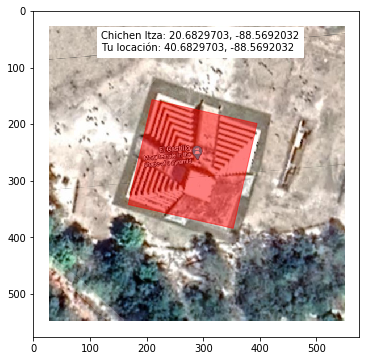

In [20]:
fig5,ax= plt.subplots(figsize=(7,6))
img= plt.imread("images/kukulkan.png")
ax.imshow(img)
rectangle=patches.Rectangle((188,178),190,190, color='red', alpha=0.5)
t = mpl.transforms.Affine2D().rotate_deg_around(294,264,-angle+0*45) + ax.transData
rectangle.set_transform(t)
ax.add_patch(rectangle)

ax.text(120,70,"Chichen Itza: 20.6829703, -88.5692032\nTu locación: %s, %s"%(lat,lon), backgroundcolor='white')

fig4.savefig("images/YourPyramidVsChichenItza.pdf")